# Análisis de Bases de datos SNIES (Ejercicio 2)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Se carga la base ded atos en un Dataframe de pandas

In [2]:
data = pd.read_csv("MEN_SNIES_test.csv")
data.rename(columns={"Institución de Educación Superior (IES)":"IES"}, inplace=True)
data.rename(columns={"Departamento de domicilio de la IES":"Departamento"}, inplace=True)
data

,IES,Sector IES,Caracter IES,Departamento,Municipio de domicilio de la IES,Programa Académico,Nivel Académico,Nivel de Formación,Metodología,Sexo,Año,Semestre,Graduados,Matriculados
0,UNIVERSIDAD LIBRE,PRIVADA,UNIVERSIDAD,RISARALDA,PEREIRA,ESPECIALIZACION EN ALTA GERENCIA,POSGRADO,ESPECIALIZACION UNIVERSITARIA,PRESENCIAL,HOMBRE,2016,2,31,39
1,UNIVERSIDAD LIBRE,PRIVADA,UNIVERSIDAD,RISARALDA,PEREIRA,ESPECIALIZACION EN ALTA GERENCIA,POSGRADO,ESPECIALIZACION UNIVERSITARIA,PRESENCIAL,HOMBRE,2016,1,17,37
2,UNIVERSIDAD LIBRE,PRIVADA,UNIVERSIDAD,RISARALDA,PEREIRA,ESPECIALIZACION EN ALTA GERENCIA,POSGRADO,ESPECIALIZACION UNIVERSITARIA,PRESENCIAL,MUJER,2016,1,20,41
3,UNIVERSIDAD LIBRE,PRIVADA,UNIVERSIDAD,RISARALDA,PEREIRA,ESPECIALIZACION EN ALTA GERENCIA,POSGRADO,ESPECIALIZACION UNIVERSITARIA,PRESENCIAL,MUJER,2016,2,29,44
4,CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-,PRIVADA,INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA,HUILA,NEIVA,INGENIERIA INDUSTRIAL,PREGRADO,UNIVERSITARIA,PRESENCIAL,HOMBRE,2016,2,79,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71091,PONTIFICIA UNIVERSIDAD JAVERIANA,PRIVADA,UNIVERSIDAD,BOGOTA D.C.,BOGOTA D.C.,MAESTRIA EN INGENIERIA INDUSTRIAL,POSGRADO,MAESTRIA,PRESENCIAL,MUJER,2019,1,2,17
71092,PONTIFICIA UNIVERSIDAD JAVERIANA,PRIVADA,UNIVERSIDAD,BOGOTA D.C.,BOGOTA D.C.,ESPECIALIZACION EN ORTOPEDIA Y TRAUMATOLOGIA,POSGRADO,ESPECIALIZACION MEDICO QUIRURGICA,PRESENCIAL,MUJER,2019,1,3,9
71093,PONTIFICIA UNIVERSIDAD JAVERIANA,PRIVADA,UNIVERSIDAD,BOGOTA D.C.,BOGOTA D.C.,ESPECIALIZACION EN ENFERMERIA EN CUIDADO CRITICO,POSGRADO,ESPECIALIZACION UNIVERSITARIA,PRESENCIAL,HOMBRE,2019,1,2,6
71094,PONTIFICIA UNIVERSIDAD JAVERIANA,PRIVADA,UNIVERSIDAD,BOGOTA D.C.,BOGOTA D.C.,CIENCIA DE LA INFORMACION - BIBLIOTECOLOGIA,PREGRADO,UNIVERSITARIA,PRESENCIAL,HOMBRE,2019,1,3,49


### 1. ¿Cuáles deon las 5 IES que mayor cantidad de graduados reportaron en el periodo 2016-2019? 

In [3]:
graduados_top5 = data[["IES", "Graduados"]].groupby("IES").sum()
graduados_top5 = graduados_top5.sort_values(by="Graduados", ascending=False)
graduados_top5.head()

,Graduados
IES,
SERVICIO NACIONAL DE APRENDIZAJE-SENA-,143808
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-,24271
UNIVERSIDAD NACIONAL DE COLOMBIA,19481
UNIVERSIDAD PONTIFICIA BOLIVARIANA,19300
UNIVERSIDAD COOPERATIVA DE COLOMBIA,18996


### ¿Corresponden estas universidad también con el top 5 de las que mayor cantidad de matriculados presentaron en este mismo periodo?

In [4]:
matriculados_top5 = data[["IES", "Matriculados"]].groupby("IES").sum()
matriculados_top5 = matriculados_top5.sort_values(by="Matriculados", ascending=False)
matriculados_top5.head()

,Matriculados
IES,
SERVICIO NACIONAL DE APRENDIZAJE-SENA-,947839
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-,231178
UNIVERSIDAD NACIONAL DE COLOMBIA,207647
UNIVERSIDAD COOPERATIVA DE COLOMBIA,197318
UNIVERSIDAD DE ANTIOQUIA,195390


### ¿Cuántas IES oficiales y cuántas privadas reportaron estudiantes graduados en el año 2019? ¿Qué porcentaje de los estudiantes graduados corresponden a IES oficiales y qué porcentaje a provadas para este mismo año?

In [5]:
graduados_2019 = data[data["Año"] == 2019]
n_privadas = len(graduados_2019[graduados_2019["Sector IES"]=="PRIVADA"]["IES"].unique())
n_publicas = len(graduados_2019[graduados_2019["Sector IES"]=="OFICIAL"]["IES"].unique())
print(f"Número de instituciones privadas que reportaron graduados = {n_privadas}")
print(f"Número de instituciones públicas que reportaron graduados = {n_publicas}")



Número de instituciones privadas que reportaron graduados = 153
Número de instituciones públicas que reportaron graduados = 66


In [6]:
m_privadas = graduados_2019[graduados_2019["Sector IES"] == "PRIVADA"]["Matriculados"].sum()
m_publicas = graduados_2019[graduados_2019["Sector IES"] == "OFICIAL"]["Matriculados"].sum()
m_total = graduados_2019["Matriculados"].sum()

print(f"Porcentaje matriculado privadas {m_privadas/m_total * 100:.1f}")
print(f"Porcentaje matriculado publicas {m_publicas/m_total * 100:.1f}")

Porcentaje matriculado privadas 52.3
Porcentaje matriculado publicas 47.7


### ¿Puedes Identificar a qué niveles de formación corresponden?

In [7]:
for i in data["Nivel de Formación"].unique():
    print(i)

ESPECIALIZACION UNIVERSITARIA
UNIVERSITARIA
MAESTRIA
TECNOLOGICA
ESPECIALIZACION MEDICO QUIRURGICA
FORMACION TECNICA PROFESIONAL
DOCTORADO
ESPECIALIZACION TECNOLOGICA


ESPECIALIZACION UNIVERSITARIA
UNIVERSITARIA
MAESTRIA
TECNOLOGICA
ESPECIALIZACION MEDICO QUIRURGICA
FORMACION TECNICA PROFESIONAL
DOCTORADO
ESPECIALIZACION TECNOLOGICA


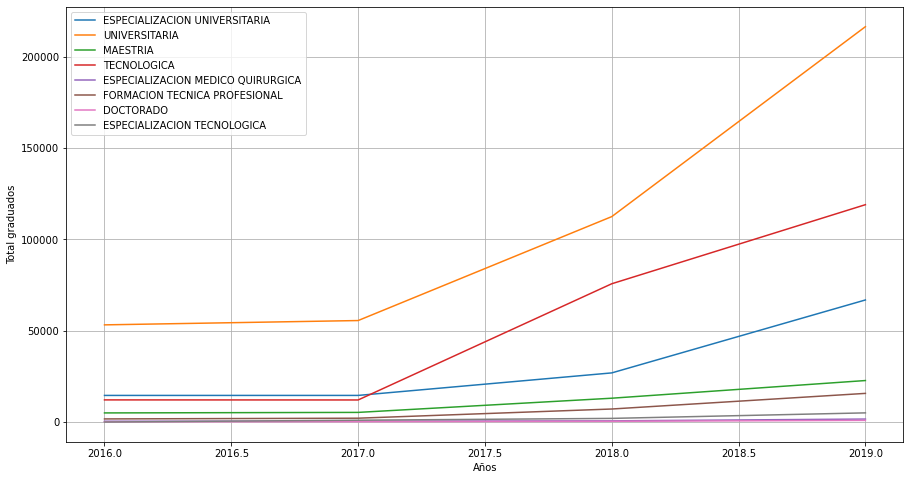

In [8]:
fig = plt.figure(figsize=(15,8))
for i in data["Nivel de Formación"].unique():
    print(i)
    nivel_formación = data[data["Nivel de Formación"] == i][["Año", "Graduados"]].groupby("Año").sum()
    plt.plot(nivel_formación, label = i)
plt.grid(True)
plt.ylabel("Total graduados")
plt.xlabel("Años")
plt.legend()

### ¿Sabes cuál es el programa académico que más graduados tuvo en el período 2016.2019 y que porcentaje representa respecto al total de graduados en dicho período?

In [9]:
programa_top = data[["Programa Académico", "Graduados"]].groupby("Programa Académico").sum()
programa_top = programa_top.sort_values(by="Graduados", ascending=False)
programa_top.head()

,Graduados
Programa Académico,
ADMINISTRACION DE EMPRESAS,42970
DERECHO,37755
CONTADURIA PUBLICA,35025
PSICOLOGIA,26365
INGENIERIA INDUSTRIAL,22679


In [10]:
total_graduados = data["Graduados"].sum()
print(f"Programa académico con más graduados -> {programa_top.iloc[0].name}")
n_progama_top = programa_top.iloc[0].values[0]
print(f"Con un porcentaje de = {n_progama_top/total_graduados * 100:.0f} %")

Programa académico con más graduados -> ADMINISTRACION DE EMPRESAS
Con un porcentaje de = 5 %


### ¿Acorde a la información del gráfico puedes inferir que estaba tratando de representar el compañero?

In [11]:
hack = data[["Departamento", "Graduados"]].groupby("Departamento").sum()
hack = hack.sort_values(by="Graduados", ascending=False)
hack.head(10)

,Graduados
Departamento,
BOGOTA D.C.,331130
ANTIOQUIA,146692
VALLE DEL CAUCA,77574
SANTANDER,70065
CALDAS,25497
ATLANTICO,22959
CUNDINAMARCA,22080
RISARALDA,21609
NORTE DE SANTANDER,16733


### 6. Teniendo en cuenta la información del año 2019 ¿Qué porcentaje del total de las IES ofrecen programas de manera virtual?

In [12]:
data_2019 = data[data["Año"] == 2019]
IES_virtual = len(data_2019[data_2019["Metodología"]=="DISTANCIA (VIRTUAL)"]["IES"].unique())
print(f"Instituciones que ofrecen virtuakidad = {IES_virtual}")
total_IES = len(data_2019["IES"].unique())
print(f"Total IES = {total_IES}")
print(f"Porcentaje que ofrece programa virtual = {IES_virtual/total_IES*100:.1f}")

Instituciones que ofrecen virtuakidad = 76
Total IES = 219
Porcentaje que ofrece programa virtual = 34.7


### 7. ¿Qué porcentaje del total de los graduados corresponde a mujeres?

In [13]:
graduados_mujer = data_2019[data_2019["Sexo"] == "MUJER"]["Graduados"].sum()
graduados_hombre = data_2019[data_2019["Sexo"] == "HOMBRE"]["Graduados"].sum()
graduados = data_2019["Graduados"].sum()

print(f"Graduados mujer = {graduados_mujer:,.0f}")
print(f"Graduados hombre = {graduados_hombre:,.0f}")
print(f"Graduados  = {graduados:,.0f}")
print("")
print(f"Porcentaje mujeres graduadas = {graduados_mujer/graduados * 100:.1f} %")

Graduados mujer = 253,146
Graduados hombre = 195,054
Graduados  = 448,200

Porcentaje mujeres graduadas = 56.5 %


### ¿Existe alguna diferencia entre los programas académicos que más graduados hombres reportan y los que más mujeres reportan o es el mismo?

In [14]:
hombre_carrera = data_2019[data_2019["Sexo"]=="HOMBRE"][["Programa Académico", "Graduados"]].groupby("Programa Académico").sum()
hombre_carrera = hombre_carrera.sort_values(by="Graduados", ascending=False)
hombre_carrera.head(10)

,Graduados
Programa Académico,
ADMINISTRACION DE EMPRESAS,8977
DERECHO,7474
INGENIERIA INDUSTRIAL,5753
CONTADURIA PUBLICA,5109
INGENIERIA CIVIL,4314
INGENIERIA DE SISTEMAS,4131
TECNOLOGIA EN CONTABILIDAD Y FINANZAS,2953
TECNOLOGIA EN GESTION EMPRESARIAL,2818
TECNOLOGIA EN ANALISIS Y DESARROLLO DE SISTEMAS DE INFORMACION,2696


In [15]:
mujer_carrera = data_2019[data_2019["Sexo"]=="MUJER"][["Programa Académico", "Graduados"]].groupby("Programa Académico").sum()
mujer_carrera = mujer_carrera.sort_values(by="Graduados", ascending=False)
mujer_carrera.head(10)

,Graduados
Programa Académico,
ADMINISTRACION DE EMPRESAS,14063
CONTADURIA PUBLICA,12128
PSICOLOGIA,11955
DERECHO,9224
TECNOLOGIA EN CONTABILIDAD Y FINANZAS,6295
TECNOLOGIA EN GESTION EMPRESARIAL,6165
LICENCIATURA EN PEDAGOGIA INFANTIL,6038
TECNOLOGIA EN GESTION ADMINISTRATIVA,5929
INGENIERIA INDUSTRIAL,4842


### Pregunta 8

En primer lugar se analiza en que ciudad ofertan INGENIERIA AMBIENTAL

In [16]:
ciudad_ing_ambiental = data[data["Programa Académico"] == "INGENIERIA AMBIENTAL"]["Departamento"].unique()
ciudad_ing_ambiental

array(['SANTANDER', 'HUILA', 'VALLE DEL CAUCA', 'ANTIOQUIA', 'CHOCO',
       'CALDAS', 'CUNDINAMARCA', 'PUTUMAYO', 'CORDOBA',
       'NORTE DE SANTANDER', 'META', 'NARIÑO', 'BOGOTA D.C.', 'BOLIVAR',
       'BOYACA', 'GUAJIRA', 'ATLANTICO', 'CAUCA'], dtype=object)

Se comprueba si efectivamente el GUAVIARE está dentro de las ciudades

In [17]:
"GUAVIARE" in  ciudad_ing_ambiental

False

Esto determina que en donde ella se encuentra no puede estudiar, descartamos la opción D. Por otra parte podemos ver bajo que Metodología se imparte la Carrera

In [18]:
met_ing_ambiental = data[data["Programa Académico"] == "INGENIERIA AMBIENTAL"]["Metodología"].unique()
met_ing_ambiental

array(['PRESENCIAL', 'DISTANCIA (VIRTUAL)', 'DISTANCIA (TRADICIONAL)'],
      dtype=object)

Se puede inferir que se imparte en las tres modalidades solamente que se se debe aseugrar el top 3 de las universidades que más graduados tienen en el programa académico 

In [19]:
top3 = data[data["Programa Académico"]=="INGENIERIA AMBIENTAL"][["IES", "Graduados"]].groupby(["IES"]).sum()
top3 = top3.sort_values(by="Graduados", ascending=False)
top3.head(5)

,Graduados
IES,
CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-,1009
UNIDADES TECNOLOGICAS DE SANTANDER,957
UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD,871
FUNDACION UNIVERSITARIA DE SAN GIL - UNISANGIL -,560
UNIVERSIDAD NACIONAL DE COLOMBIA,513


Esto descarta la opción A, dado que no necesarimante el top 3 de Universidades está en Bogotá. Faltaria ver del las tres primeras universidades , cual de ellas ofrece presencialidad o virtualidad 

In [20]:
uni1 = top3.iloc[0].name
uni2 = top3.iloc[1].name
uni3 = top3.iloc[2].name

print(f"Modalidades {uni1}")
print(data[(data["IES"]==uni1) & (data["Programa Académico"]=="INGENIERIA AMBIENTAL")]["Metodología"].unique())
print(f"Modalidades {uni2}")
print(data[(data["IES"]==uni2) & (data["Programa Académico"]=="INGENIERIA AMBIENTAL")]["Metodología"].unique())
print(f"Modalidades {uni3}")
print(data[(data["IES"]==uni3) & (data["Programa Académico"]=="INGENIERIA AMBIENTAL")]["Metodología"].unique())


Modalidades CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-
['PRESENCIAL']
Modalidades UNIDADES TECNOLOGICAS DE SANTANDER
['PRESENCIAL']
Modalidades UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD
['DISTANCIA (TRADICIONAL)']


Esto descarta la posibildad que se pueda estudiar de manera virtual, deberá trasladarse a una ciudad principal

### 9. ¿Cuántas IES existen en las que Andrés podría estudiar?

In [38]:
nivel = data[data["Nivel de Formación"]=="FORMACION TECNICA PROFESIONAL"]
met   = nivel[nivel["Metodología"]=="PRESENCIAL"]
sector = met[met["Sector IES"] == "OFICIAL"]
ciudad = sector[sector["Municipio de domicilio de la IES"] == "CALI"]
programas = ciudad["IES"].unique()
programas

array(['INSTITUTO TECNICO NACIONAL DE COMERCIO SIMON RODRIGUEZ - INTENALCO',
       'INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO'], dtype=object)

Ahora, se debe buscar cuantos programas académicos ofrecen cada una de estas instituciones

In [52]:
uni1_pr = ciudad[ciudad["IES"] == programas[0]]["Programa Académico"].unique()
print(uni1_pr)
print(len(uni1_pr))

['TECNICA PROFESIONAL EN COSTOS Y CONTABILIDAD'
 'TECNICA PROFESIONAL EN GESTION EMPRESARIAL'
 'TECNICA PROFESIONAL EN SALUD OCUPACIONAL'
 'TECNICO PROFESIONAL EN PROCESOS DE IMPORTACIONES Y EXPORTACIONES'
 'TECNICO PROFESIONAL EN PROCESOS ADMINISTRATIVOS DE SEGURIDAD Y SALUD EN EL TRABAJO'
 'TECNICO PROFESIONAL EN PROCESOS VIALES Y DE TRANSPORTE'
 'TECNICO PROFESIONAL EN MERCADEO']
7


In [53]:
uni1_pr = ciudad[ciudad["IES"] == programas[1]]["Programa Académico"].unique()
print(uni1_pr)
print(len(uni1_pr))

['TECNICO PROFESIONAL EN PROCESOS EMPRESARIALES'
 'TECNICO PROFESIONAL EN LOGISTICA EMPRESARIAL']
2
